## Exercise 3

Consider the simple, non-spatial SIR modelLinks to an external site.:

In this epidemiology model,  is the number of "susceptible" individuals,  is the number of infected individuals,  is the removed population that can no longer become sick,  is the total population (hence ),  is a scale factor measuring how likely an infected person is to make a susceptible person sick,  measures the rate at which infected individuals are removed from that state.

Write a Python function that uses the Explicit Euler method to plot  given  and  (the last time point to compute). (N follows from the formula.) Do not use an integration library; provide your own implementation (5 points).

The New Haven population is approximately . Suppose that on day 0, there was 1 person infected with a new disease in New Haven and everyone else was susceptible (as the disease is new). Suppose further that  and . Plot the time course of the number of infected individuals until that number drops below 1 (at which point, we'll assume the disease has run its course). (5 points)

For those parameter values, when does the number of infected people peak? (2 points) How many people are infected at the peak? (3 points). (Have your code identify these things; don't do it manually.)

Unfortunately, for new diseases, we may not know  or  with much accuracy. Vary these two variables over "nearby" values, and plot on a heat map how the time of the peak of the infection depends on these two variables. (5 points). Do the same for the number of individuals infected at peak. (5 points)

Hint: if you're using plotnine, consider using geom_raster or geom_tileLinks to an external site. to make the heat map. Other approaches are fine too.

## Response

In [228]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
delta_time = 0.1

def ExplicitEuler(s0, i0, r0, beta, gamma, tmax, plot):
    
    t = 0 
    s = s0
    i = i0
    r = r0
    peak_reached = False
    peak_day= 0
    peak_infection=i0
    
    #x and y variables for the plot
    days = [0] 
    infected = [i0] 
    
    while t < tmax:
        susceptible_next = s + (-1*(beta/(s+i+r))*s*i)*delta_time
        infected_next = i + ((beta/(s+i+r))*s*i - (gamma*i))*delta_time
        removed_next = r + gamma*i*delta_time
        
        infected.append(infected_next)
        t = t + delta_time
        days.append(t)
        
        s, i, r = susceptible_next, infected_next, removed_next
        
        if not peak_reached and ((beta/(s+i+r))*s*i - (gamma*i))<0:
            peak_reached = True
            peak_day = round(t)
            peak_infection = round(i)
            
        
        if i<1: 
            break
    if plot:
        plt.figure(figsize=(10,7))
        plt.plot(days, infected)
        plt.xlabel("Days")
        plt.ylabel("Infected People")
        plt.title("SIR Model : Euler Method")
    
    return peak_day, peak_infection

The number of infected people peaked on 12th day.
The number of people infected at the peak were 21051.


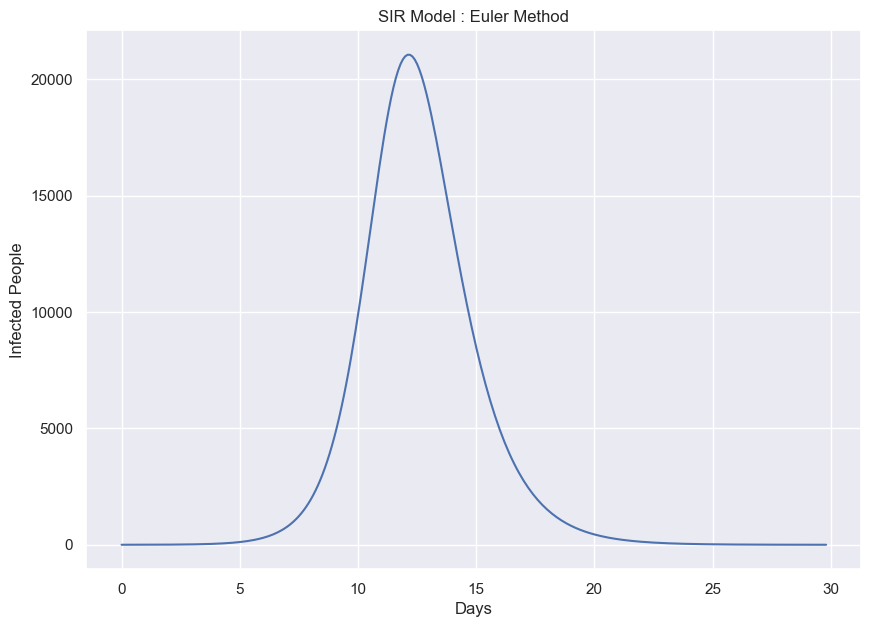

In [230]:
peak_day, peak_infection = ExplicitEuler((134000), 1,0, 2, 1, 1000, True)
print(f'The number of infected people peaked on {peak_day}th day.')
print(f'The number of people infected at the peak were {peak_infection}.')

#### Creating a list to Vary beta and gamma over "nearby" values.

In [231]:
Gamma = []
Beta = []
peak_days = []
peakinfection = []
for gamma in np.arange(0.25, 2.0, 0.25):
    for beta in np.arange(0.5, 5.5, 0.5):
        peak_day, peak_infection = ExplicitEuler((134000), 1, 0, beta, gamma, 100, False)
        Beta.append(beta)
        Gamma.append(gamma)
        peak_days.append(peak_day)
        peakinfection.append(peak_infection)

In [232]:
# Creating a dataframe of the above parameters

df = pd.DataFrame({'beta': Beta,'gamma' :Gamma, 'peak_day': peak_days,'peak_infections': peakinfection})

#### Plotting HeatMap to show how the time of the peak of the infection depends on variables beta and gamma.

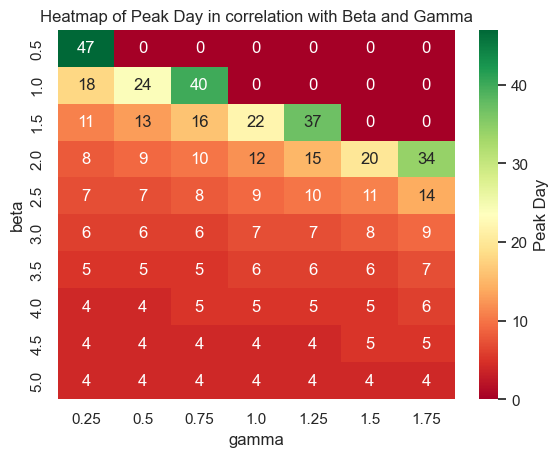

In [233]:
Parameters = df.pivot("beta", "gamma", "peak_day")
ax = plt.axes()
sns.heatmap(Parameters,fmt="",cmap='RdYlGn', annot=True, cbar_kws={'label': 'Peak Day'})
ax.set_title("Heatmap of Peak Day in correlation with Beta and Gamma")
plt.show()

 #### Plotting HeatMap to show how the number of individuals infected at peak. depends on variables beta and gamma

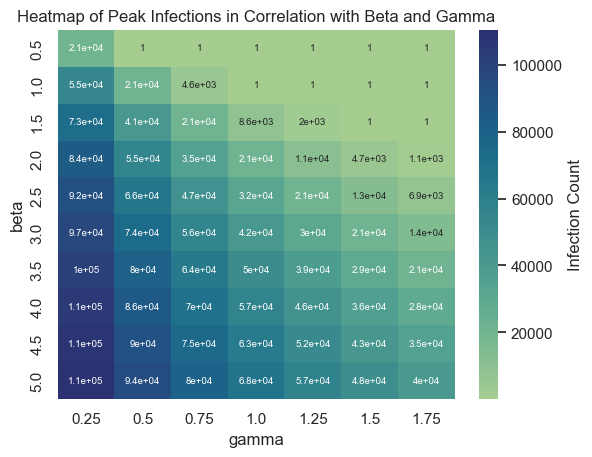

In [234]:
Parameters = df.pivot("beta", "gamma", "peak_infections")
ax = plt.axes()
sns.heatmap(Parameters, cmap="crest", annot=True, annot_kws={"size": 7}, cbar_kws={'label': 'Infection Count'})
ax.set_title("Heatmap of Peak Infections in Correlation with Beta and Gamma")
plt.show()